In [50]:
import os
import numpy as np
import pandas as pd
from pprint import pprint
# Install scikit-learn if not installed
!pip install scikit-learn
import matplotlib.pyplot as plt
# Import sklearn utilities

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns


In [3]:
pd.read_csv("Titanic-Dataset.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



Describe (numerical):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


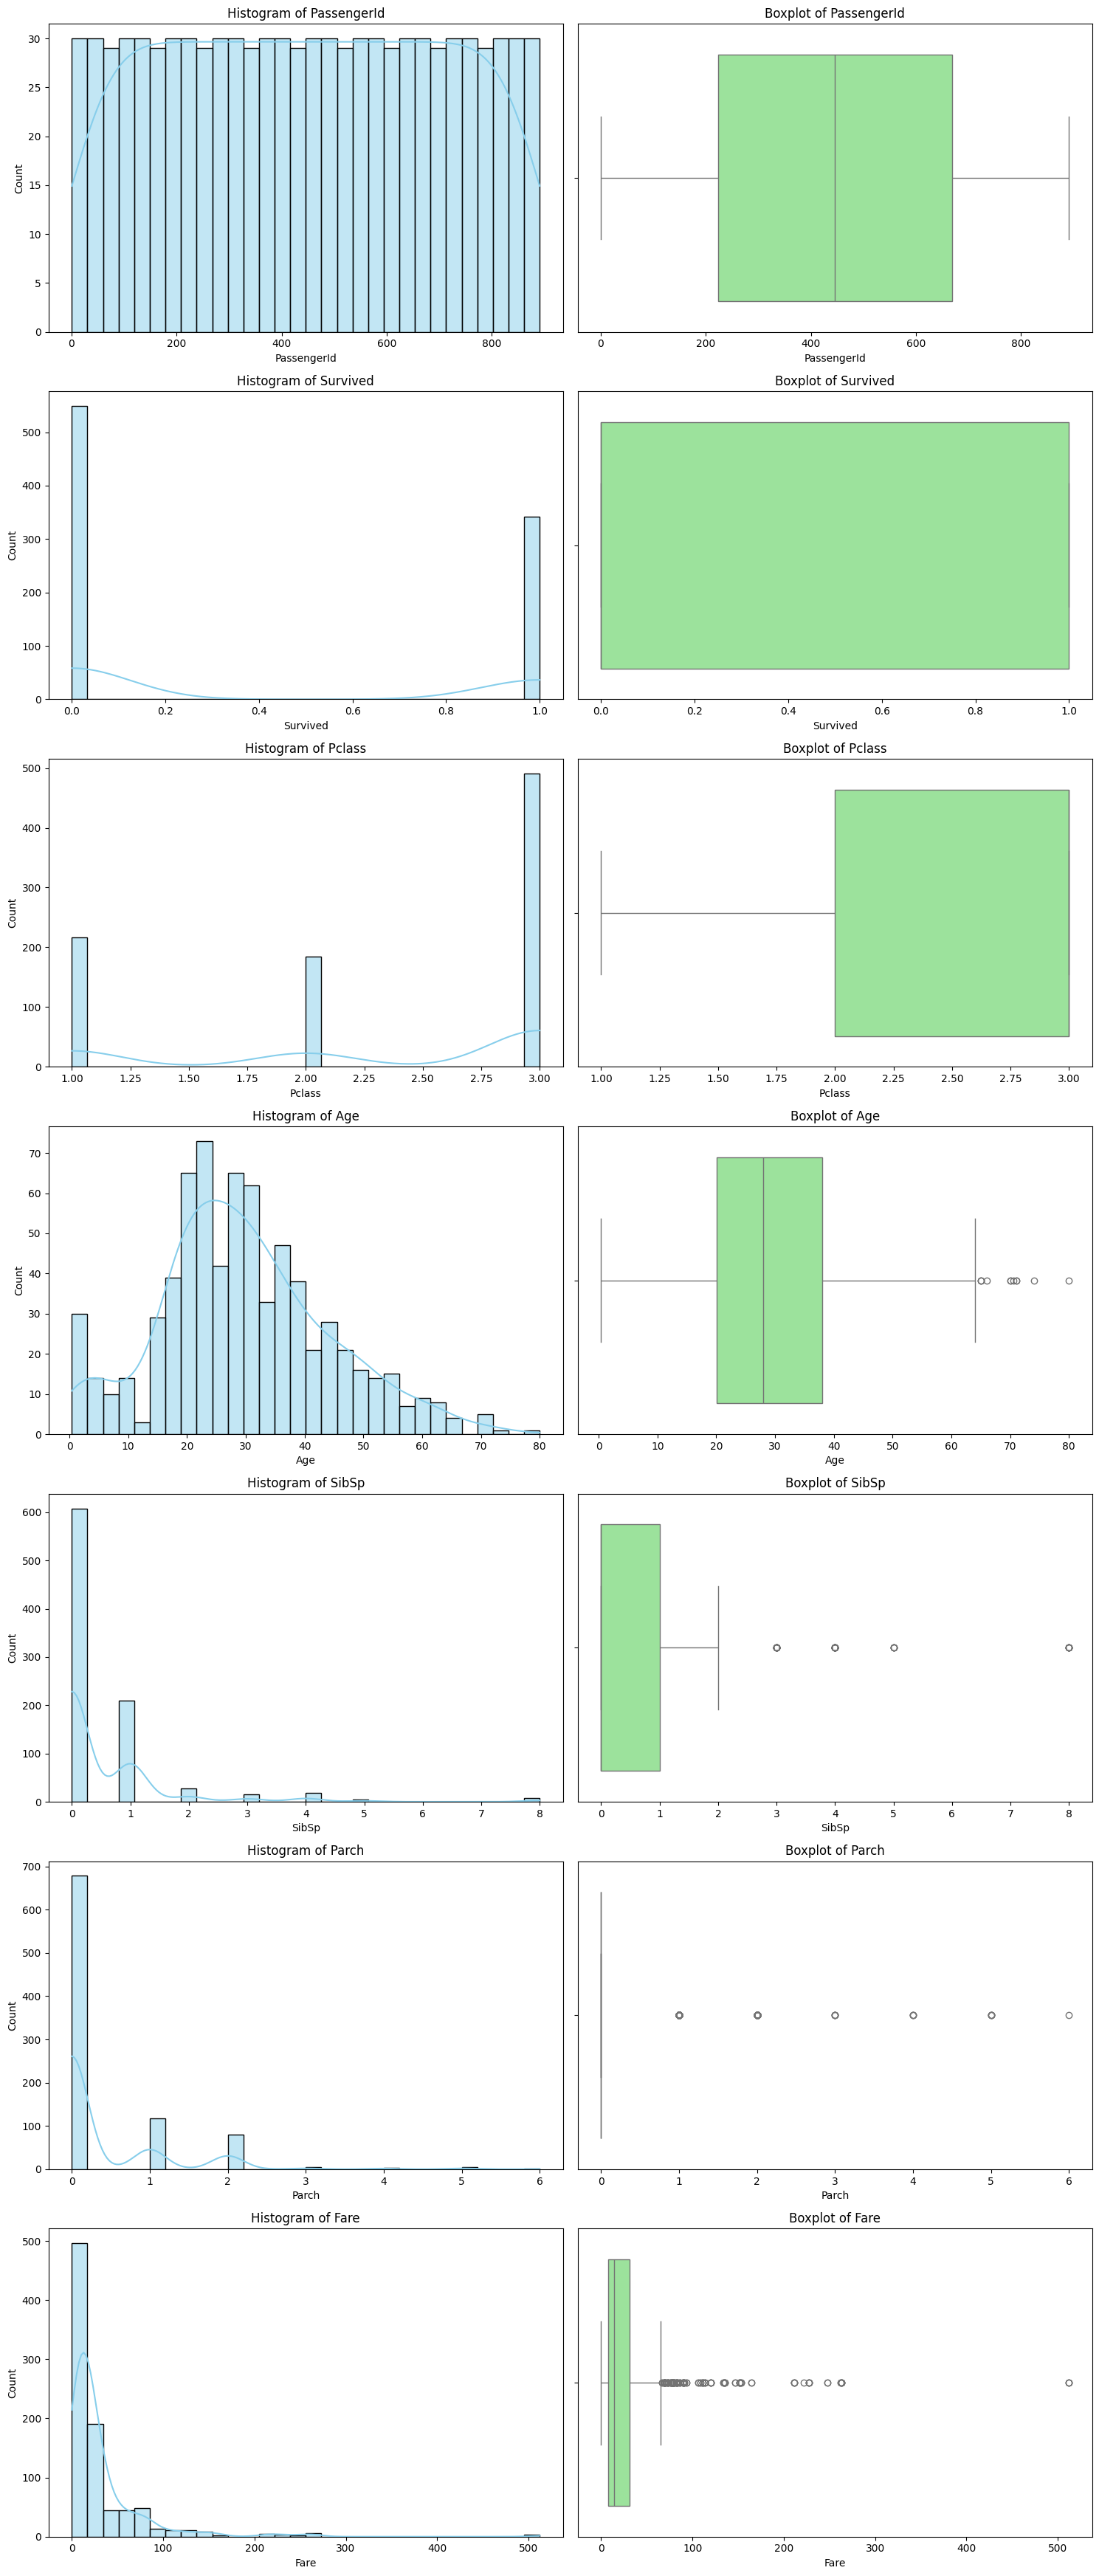

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Display descriptive statistics
print('\nDescribe (numerical):')
display(df.describe())

# 2. Plot histograms for all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5*len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [8]:
# missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_tbl = pd.concat([missing, missing_pct], axis=1, keys=['missing', 'percent'])
print('\nMissing values (top 20):')
display(missing_tbl.head(20))

print('\nDuplicate rows:', df.duplicated().sum())


Missing values (top 20):


,missing,percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000



Duplicate rows: 0


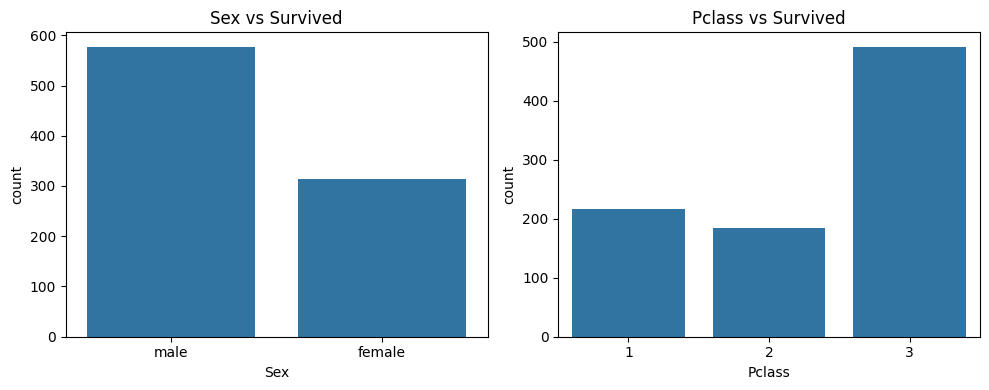

In [10]:
# Visualization 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Sex')
plt.title('Sex vs Survived')


plt.subplot(1,2,2)
sns.countplot(data=df, x='Pclass')
plt.title('Pclass vs Survived')
plt.tight_layout()
plt.show()

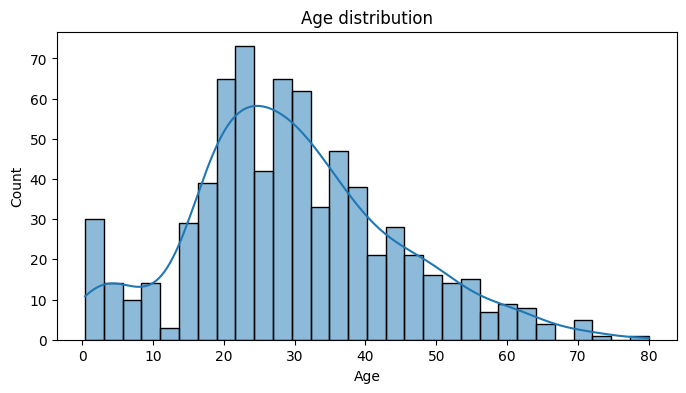

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age distribution')
plt.show()

In [13]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
# reduce rare titles
common_titles = ['Mr','Mrs','Miss','Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Rare')
print('Titles counts:')
display(df['Title'].value_counts())

Titles counts:


Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

In [18]:
df['Cabin'] = df['Cabin'].fillna('U').astype(str).str[0]
print('\nCabin counts:')
display(df['Cabin'].value_counts())


Cabin counts:


Cabin
U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_17500\3690903751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


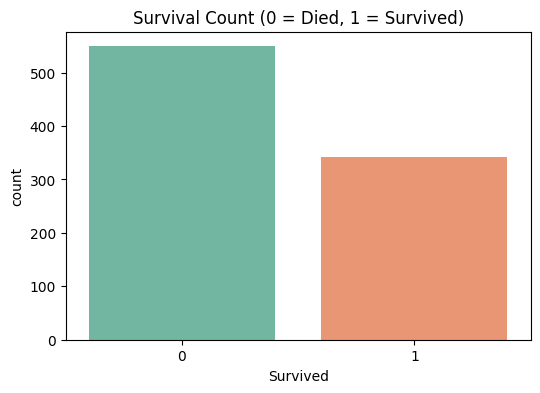

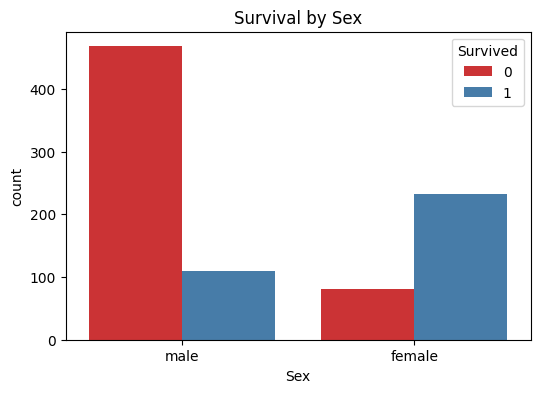

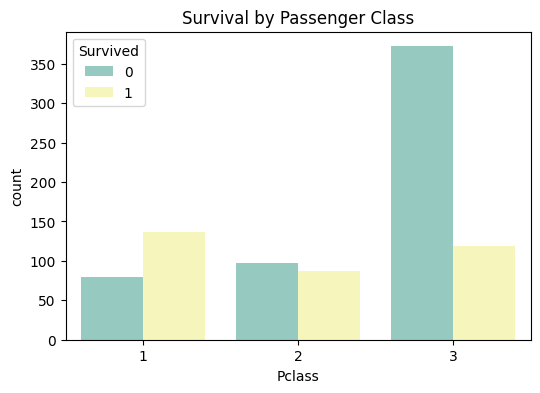

In [20]:
#  Survival Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

#  Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Sex")
plt.show()

#  Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

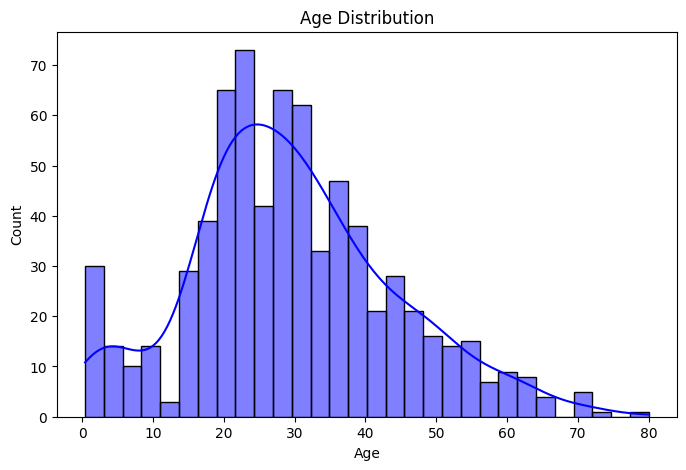

C:\Users\User\AppData\Local\Temp\ipykernel_17500\2000622658.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["Survived"]==1, "Age"].dropna(), shade=True, label="Survived")
C:\Users\User\AppData\Local\Temp\ipykernel_17500\2000622658.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df["Survived"]==0, "Age"].dropna(), shade=True, label="Died")


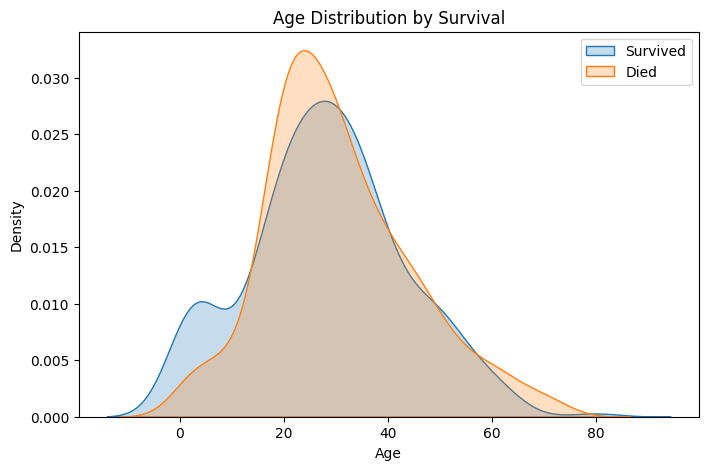

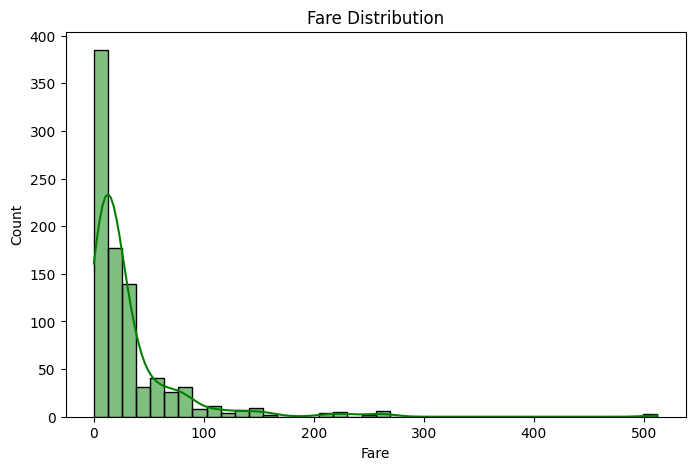

In [21]:
#  Age Distribution 
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#  Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df["Survived"]==1, "Age"].dropna(), shade=True, label="Survived")
sns.kdeplot(df.loc[df["Survived"]==0, "Age"].dropna(), shade=True, label="Died")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

#  Fare Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Fare"], kde=True, bins=40, color="green")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

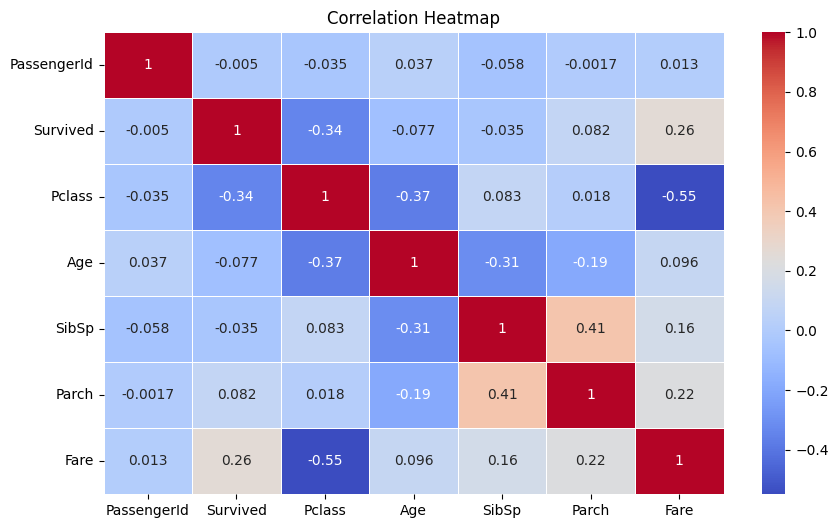

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Correct way to fill missing values without FutureWarning
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())


In [25]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64


In [27]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+).', expand=False)

# Group rare titles
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
df['Title'] = df['Title'].replace(['Mme'], 'Mrs')


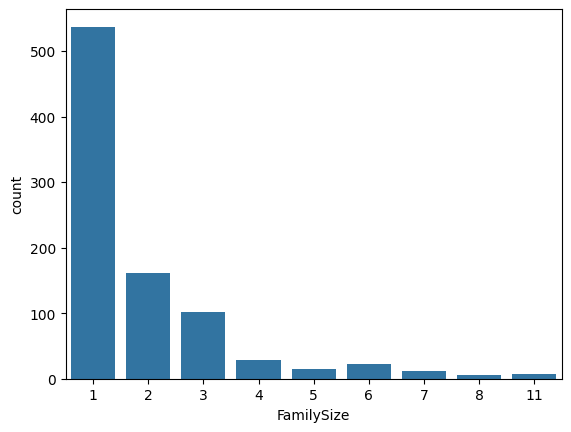

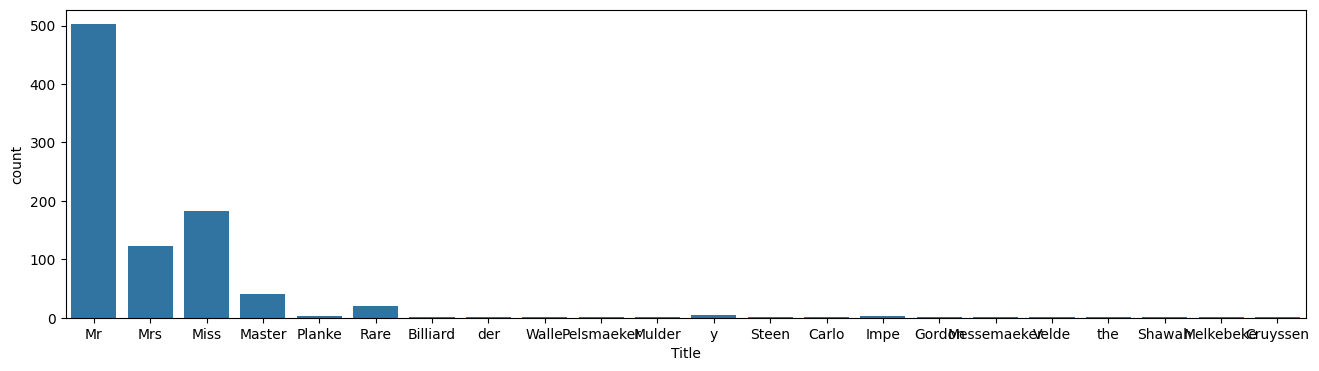

In [31]:
sns.countplot(x='FamilySize', data=df)
plt.show()

plt.figure(figsize=(16, 4)) 
sns.countplot(x='Title', data=df)
plt.show()


In [34]:
# Label Encoding for Sex, Embarked, Title
label_encoders = {}
categorical_cols = ['Sex','Embarked','Title']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [36]:
# Check null values
print(df.isnull().sum())

# Statistical summary of numerical features
display(df.describe())

# Statistical summary of categorical features
display(df.describe(include='object'))


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
FamilySize     0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476,8.932660,1.904602
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503,1.799488,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,8.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,9.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,9.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,21.000000,11.000000


,Name,Ticket,Deck
count,891,891,891
unique,891,681,9
top,"Dooley, Mr. Patrick",347082,U
freq,1,7,687


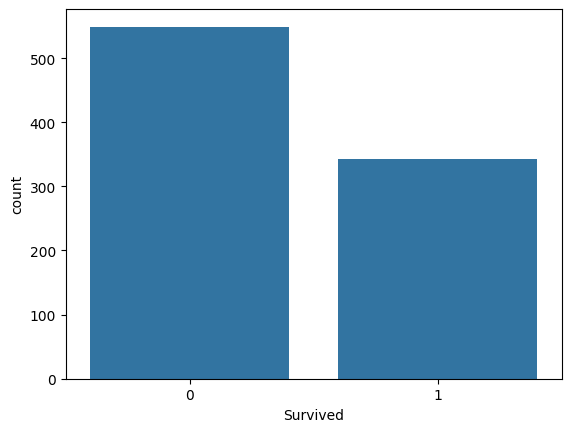

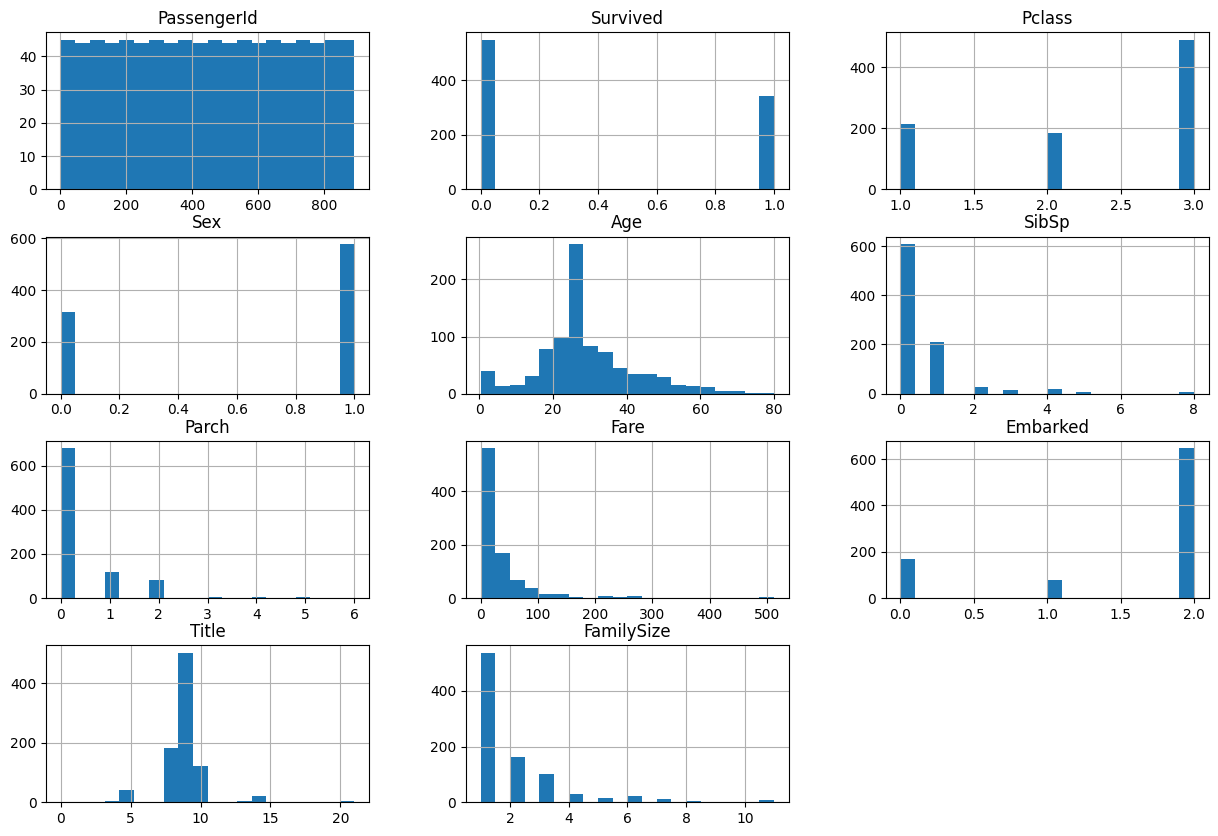

In [38]:
# Countplot for Survived
sns.countplot(x='Survived', data=df)
plt.show()

# Visualize numerical features
df.hist(bins=20, figsize=(15,10))
plt.show()



In [40]:
df.drop(columns=['PassengerId','Name','Ticket'], inplace=True)


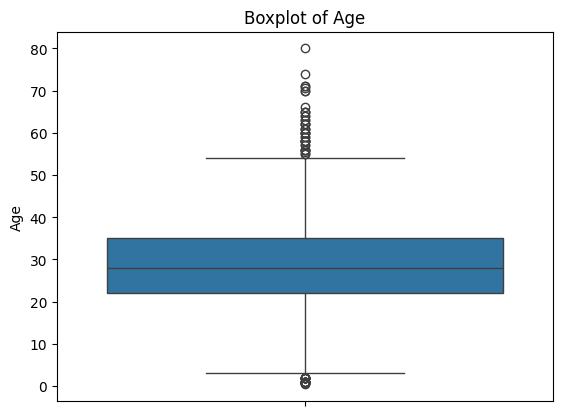

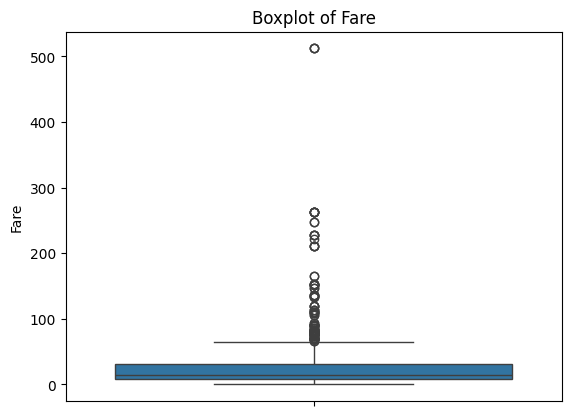

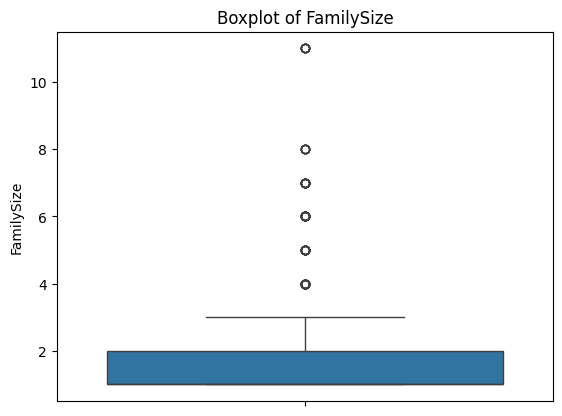

In [41]:
# Boxplot to visualize outliers
numerical_cols = ['Age','Fare','FamilySize']
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Optional: Remove extreme outliers (e.g., Age > 80 or Fare > 500)
df = df[df['Age'] <= 80]
df = df[df['Fare'] <= 500]


In [42]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [45]:
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
print(X_train.head())

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  Title Deck  \
709       3    1 -0.102950      1      1 -0.372665         0      5    U   
239       2    1  0.280789      0      0 -0.444854         2      9    U   
382       3    1  0.204041      0      0 -0.550557         2      9    U   
794       3    1 -0.333194      0      0 -0.551266         2      9    U   
684       2    1  2.352981      1      1  0.204549         2      9    U   

     FamilySize  
709    0.677196  
239   -0.561424  
382   -0.561424  
794   -0.561424  
684    0.677196  


In [48]:
print(y_train.head())

709    1
239    0
382    0
794    0
684    0
Name: Survived, dtype: int64


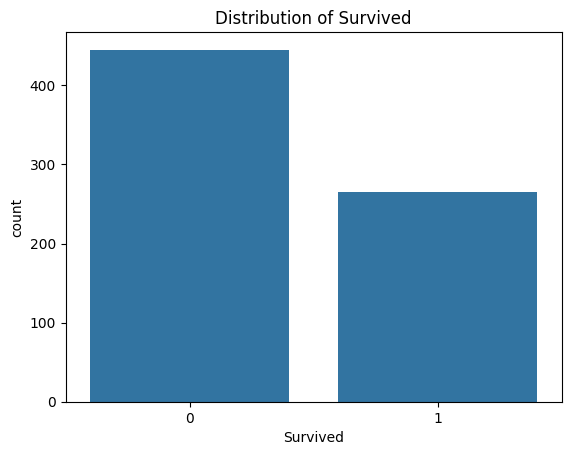

In [49]:
sns.countplot(x=y_train)
plt.title('Distribution of Survived')
plt.show()


In [51]:
# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Sex', 'Embarked', 'Title']

# Encode categorical features
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [54]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'], errors='ignore', inplace=True)


In [55]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [63]:
# Drop the problematic column
df = df.drop(columns=['Deck'])


In [64]:
print(df.dtypes)


Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
Title           int64
FamilySize      int64
dtype: object


In [65]:
X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.8258426966292135

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.79      0.80      0.79        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



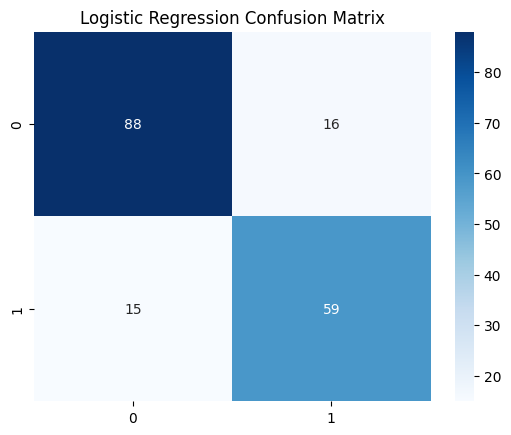

In [66]:
# Train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.8146067415730337

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       104
           1       0.76      0.81      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



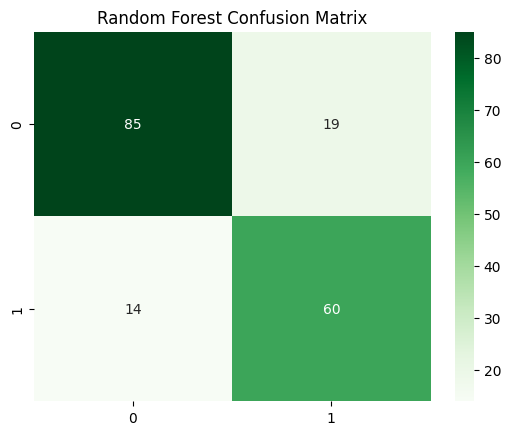

In [67]:
# Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()
